# Wind Power Generation Forecasting Using AI

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the CSV (Dataset) files using raw strings to avoid escape character issues
location1 = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\ALL PROJECT\Wind Power Generation Forecasting - AI\Datasets\Location1.csv')
location2 = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\ALL PROJECT\Wind Power Generation Forecasting - AI\Datasets\Location2.csv')
location3 = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\ALL PROJECT\Wind Power Generation Forecasting - AI\Datasets\Location3.csv')
location4 = pd.read_csv(r'C:\Users\prajw\OneDrive\Desktop\ALL PROJECT\Wind Power Generation Forecasting - AI\Datasets\Location4.csv')

In [3]:
# See the location 1
location1.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793


In [4]:
# Add a new column to identify the location
location1['location'] = 'location1'
location2['location'] = 'location2'
location3['location'] = 'location3'
location4['location'] = 'location4'

# Concatenate the dataframes
merged_data = pd.concat([location1, location2, location3, location4], ignore_index=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,location
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,location1
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,location1
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,location1
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,location1
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,location1


In [5]:
# Save the merged dataset to a new CSV file
merged_data.to_csv('merged_location.csv', index=False)

In [6]:
# To see the basic information about the dataset
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175200 entries, 0 to 175199
Data columns (total 11 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Time                 175200 non-null  object 
 1   temperature_2m       175200 non-null  float64
 2   relativehumidity_2m  175200 non-null  int64  
 3   dewpoint_2m          175200 non-null  float64
 4   windspeed_10m        175200 non-null  float64
 5   windspeed_100m       175200 non-null  float64
 6   winddirection_10m    175200 non-null  int64  
 7   winddirection_100m   175200 non-null  int64  
 8   windgusts_10m        175200 non-null  float64
 9   Power                175200 non-null  float64
 10  location             175200 non-null  object 
dtypes: float64(6), int64(3), object(2)
memory usage: 14.7+ MB


In [7]:
# To check the statistics of dataset
merged_data.describe().T

,count,mean,std,min,25%,50%,75%,max
temperature_2m,175200.0,46.655994,22.012738,-31.2,30.2000,46.9000,65.3000,101.7000
relativehumidity_2m,175200.0,70.155291,17.326678,9.0,57.0000,72.0000,84.0000,100.0000
dewpoint_2m,175200.0,36.516241,20.933153,-36.2,21.9000,36.2000,54.6000,78.7000
windspeed_10m,175200.0,4.157639,2.012682,0.0,2.6300,3.8500,5.3800,18.5300
windspeed_100m,175200.0,6.879334,3.043964,0.0,4.7000,6.6800,8.8000,24.5900
winddirection_10m,175200.0,201.589446,99.639040,1.0,130.0000,211.0000,288.0000,360.0000
winddirection_100m,175200.0,201.539070,100.683777,0.0,129.0000,211.0000,290.0000,360.0000
windgusts_10m,175200.0,8.038205,3.617488,0.5,5.3000,7.6000,10.3000,29.2000
Power,175200.0,0.303429,0.257325,0.0,0.0877,0.2331,0.4742,0.9994


In [8]:
# Check the missing values in the dataset
merged_data.isnull().sum()

Time                   0
temperature_2m         0
relativehumidity_2m    0
dewpoint_2m            0
windspeed_10m          0
windspeed_100m         0
winddirection_10m      0
winddirection_100m     0
windgusts_10m          0
Power                  0
location               0
dtype: int64

In [9]:
# To check the duplicate rows
merged_data.duplicated().sum()

np.int64(0)

In [10]:
# Encode the categorical variables
merged_data = pd.get_dummies(merged_data, columns=['location'], drop_first=True)
merged_data.head()

,Time,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,location_location2,location_location3,location_location4
0,2017-01-02 00:00:00,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,2017-01-02 01:00:00,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,2017-01-02 02:00:00,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,2017-01-02 03:00:00,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,2017-01-02 04:00:00,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [11]:
merged_data.columns

Index(['Time', 'temperature_2m', 'relativehumidity_2m', 'dewpoint_2m',
       'windspeed_10m', 'windspeed_100m', 'winddirection_10m',
       'winddirection_100m', 'windgusts_10m', 'Power', 'location_location2',
       'location_location3', 'location_location4'],
      dtype='object')

In [12]:
# Let's remove time column
merged_data.drop('Time', axis=1, inplace=True)

In [13]:
merged_data.head()

,temperature_2m,relativehumidity_2m,dewpoint_2m,windspeed_10m,windspeed_100m,winddirection_10m,winddirection_100m,windgusts_10m,Power,location_location2,location_location3,location_location4
0,28.5,85,24.5,1.44,1.26,146,162,1.4,0.1635,False,False,False
1,28.4,86,24.7,2.06,3.99,151,158,4.4,0.1424,False,False,False
2,26.8,91,24.5,1.30,2.78,148,150,3.2,0.1214,False,False,False
3,27.4,88,24.3,1.30,2.69,58,105,1.6,0.1003,False,False,False
4,27.3,88,24.1,2.47,4.43,58,84,4.0,0.0793,False,False,False


In [14]:
# Let's ex tract the numerical columns
numerical_columns = merged_data.select_dtypes(include=['number']).columns
numerical_columns

Index(['temperature_2m', 'relativehumidity_2m', 'dewpoint_2m', 'windspeed_10m',
       'windspeed_100m', 'winddirection_10m', 'winddirection_100m',
       'windgusts_10m', 'Power'],
      dtype='object')

In [15]:
merged_data.shape

(175200, 12)

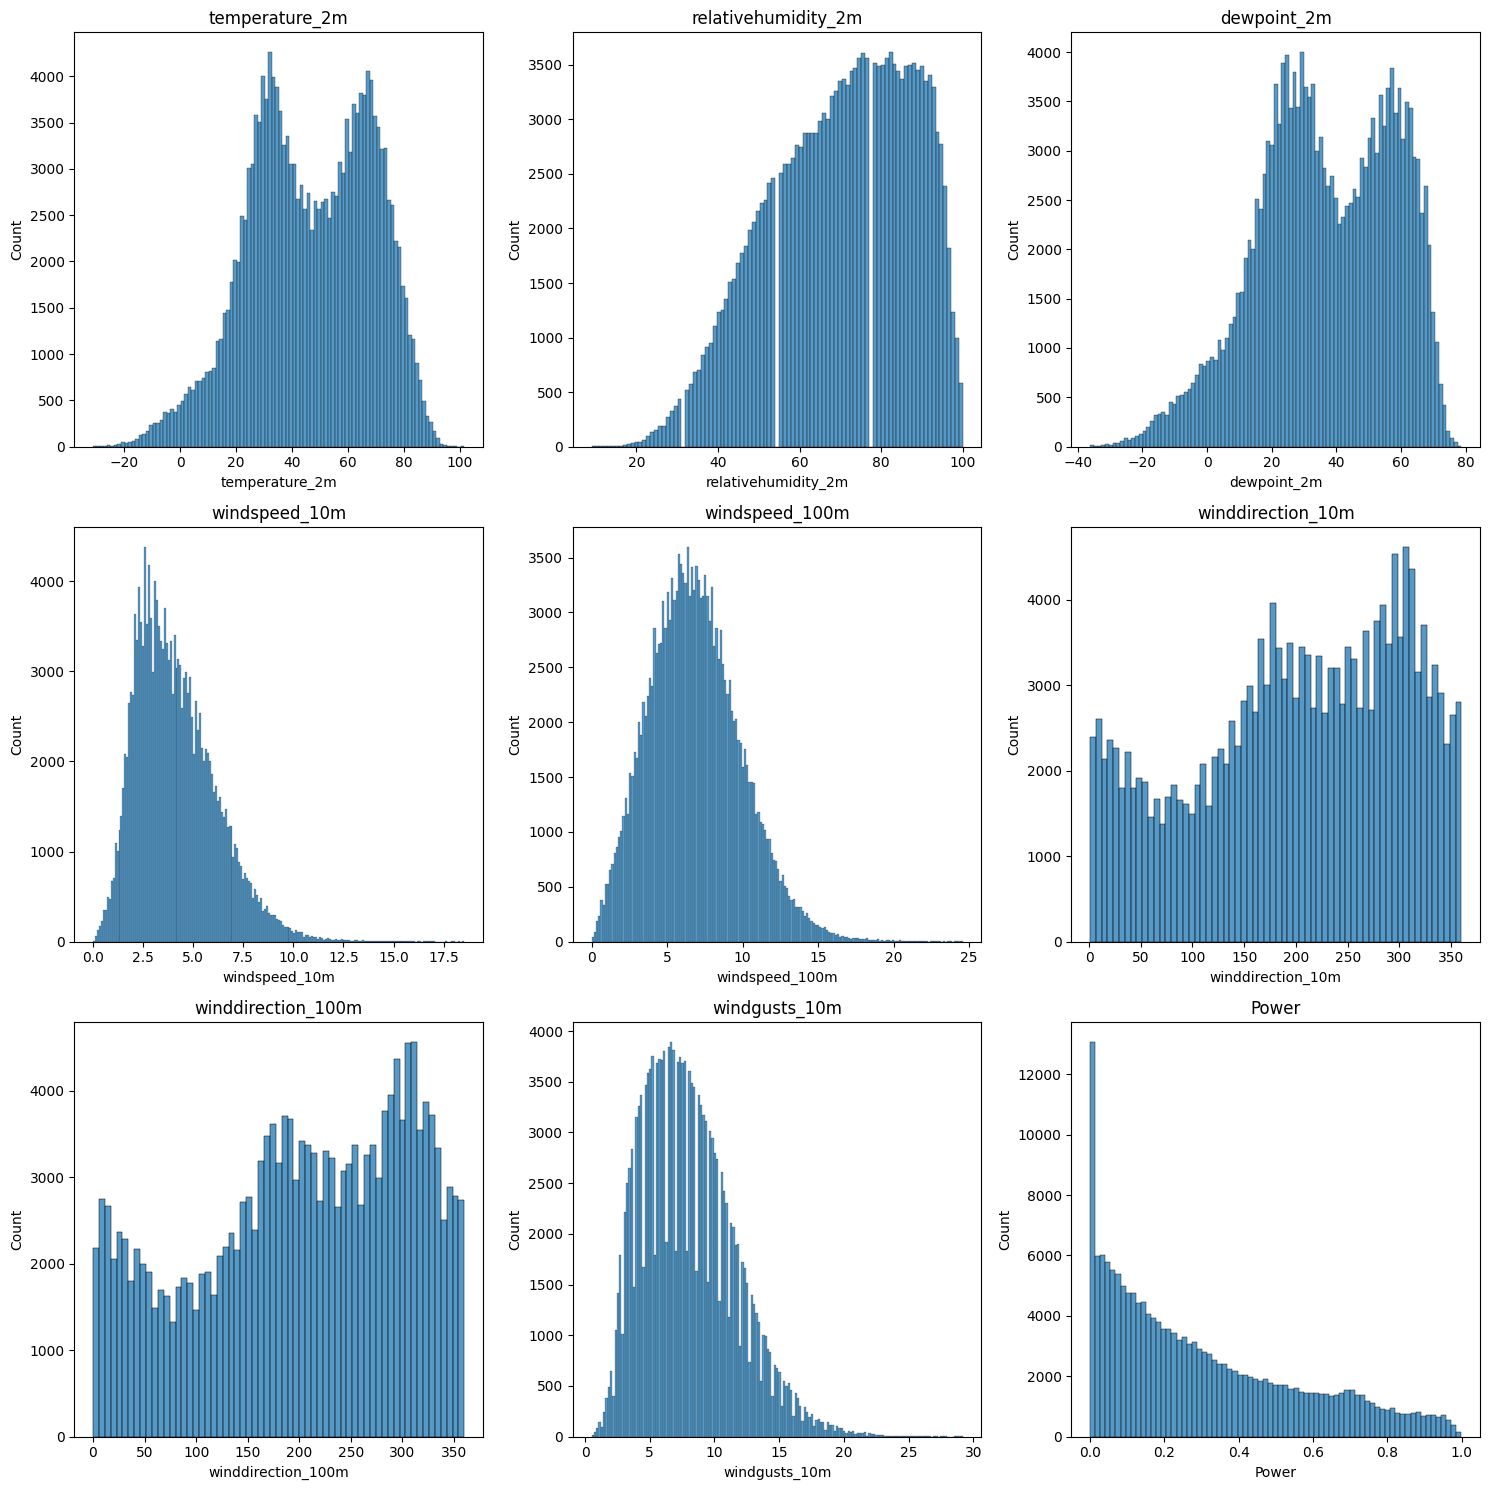

In [16]:
# Let's plot using subplots for the data distribution of each numerical cols
fig, axs = plt.subplots(3, 3, figsize=(15, 15))
axes = axs.flatten()
for i, col in enumerate(numerical_columns):
    sns.histplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()

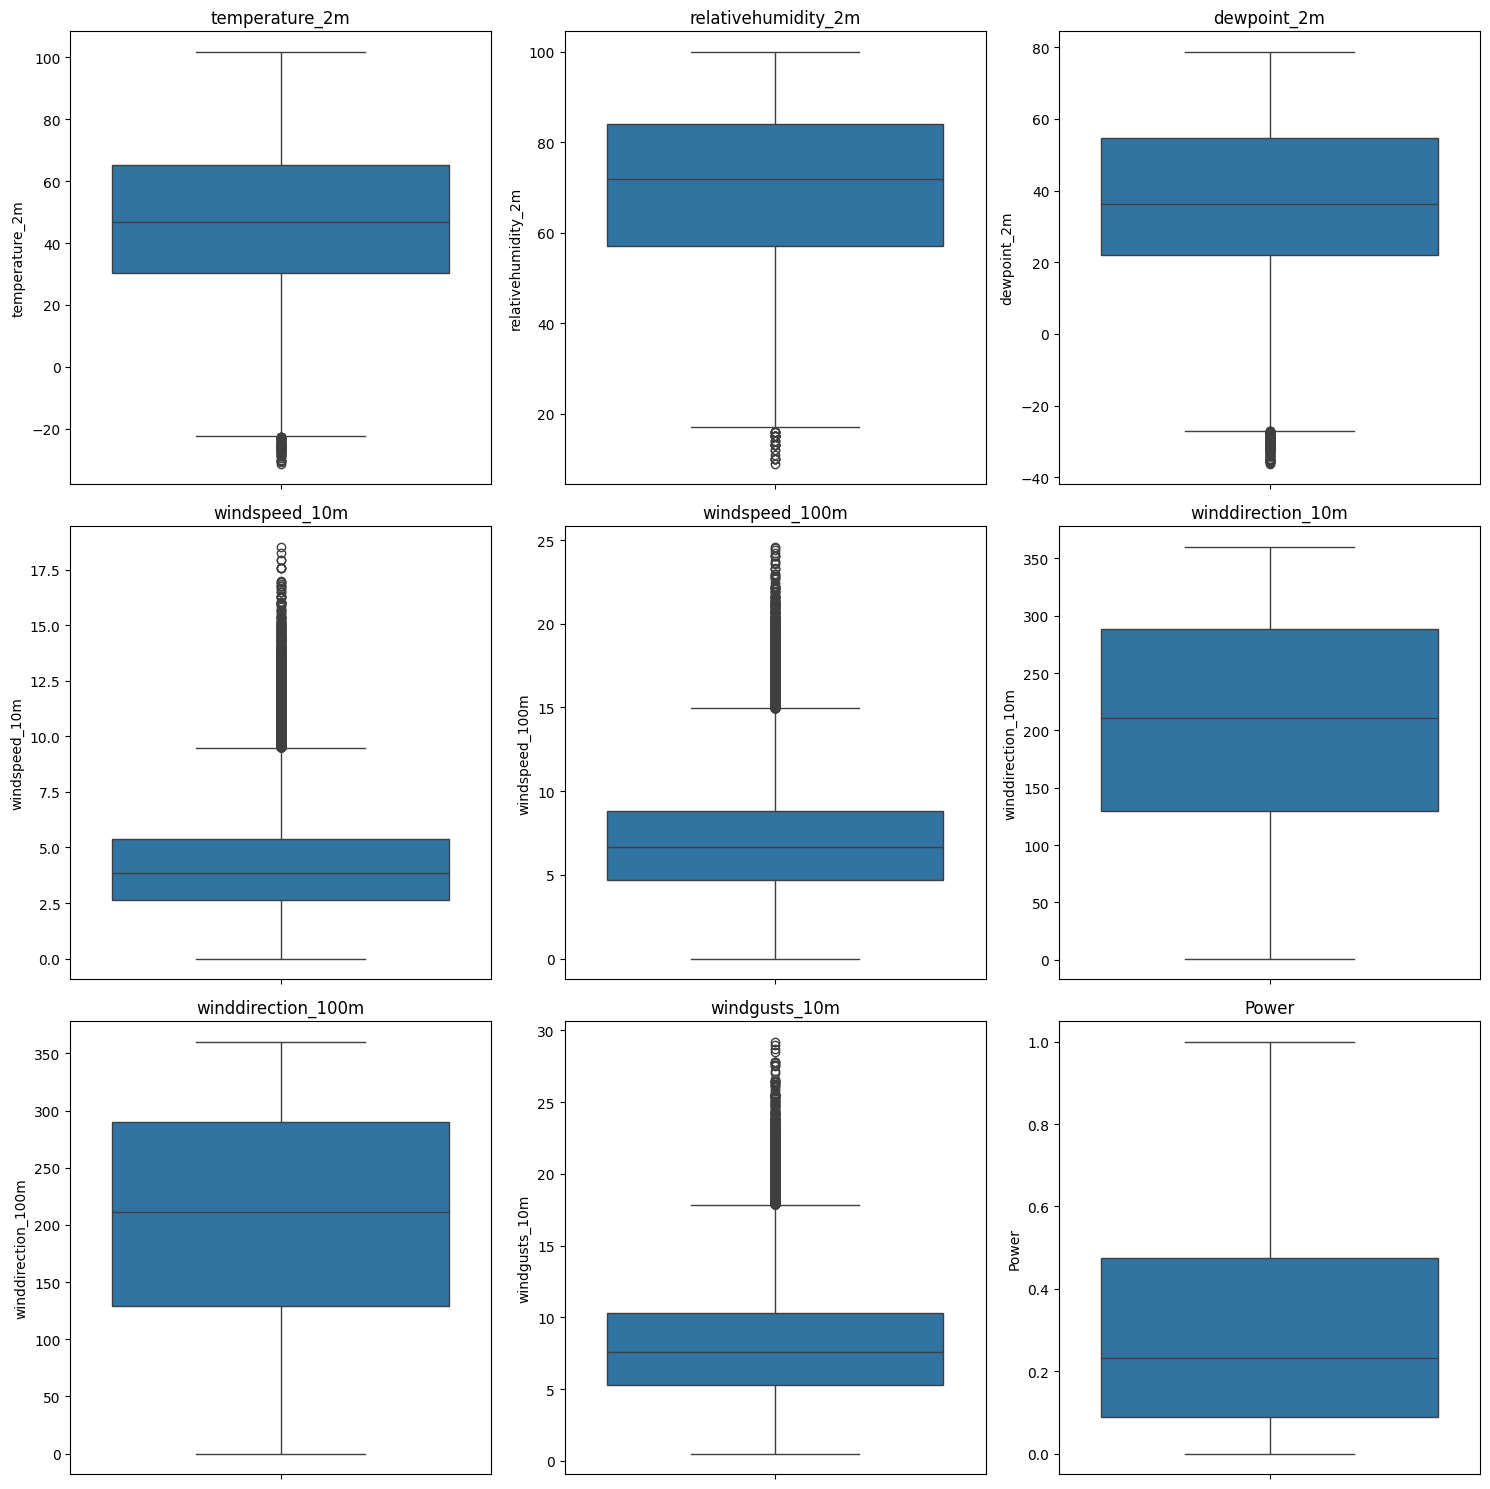

In [17]:
# Let's us create box plot
fig, axes = plt.subplots(3,3, figsize=(15,15))
axes = axes.flatten()
for i, col in enumerate(numerical_columns):
    sns.boxplot(merged_data[col], ax=axes[i])
    axes[i].set_title(col)
    plt.tight_layout()

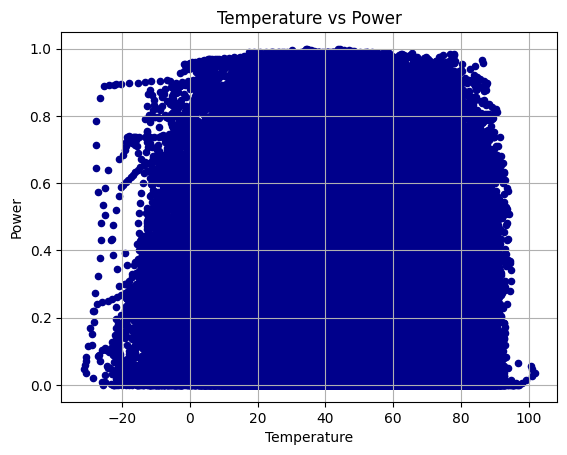

In [18]:
# Let's use scatter plot to see the relationship between power & temp
merged_data.plot.scatter(x='temperature_2m', y='Power', c='DarkBlue')
plt.xlabel('Temperature')
plt.ylabel('Power')
plt.title('Temperature vs Power')
plt.grid(True)
plt.show()

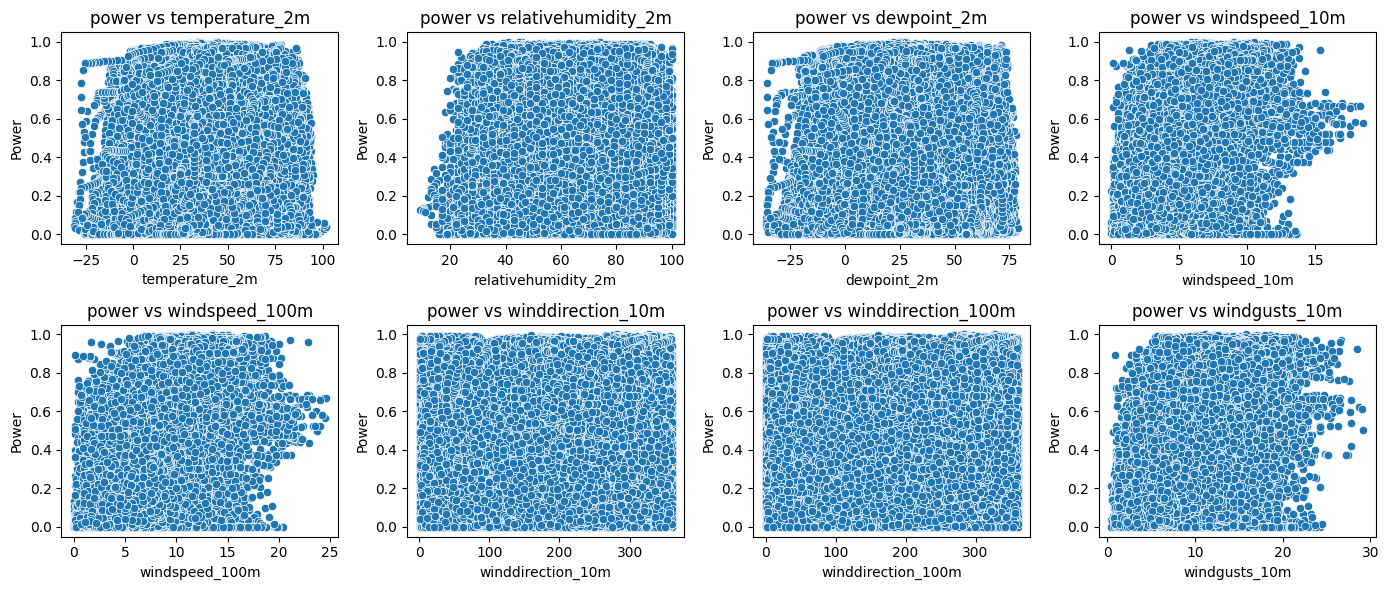

In [19]:
# Creating multiple plots to see the relation btw different cols and power
fig, axes = plt.subplots(2,4, figsize=(14,6))
axes = axes.flatten()
for i, col in enumerate(numerical_columns.drop('Power')):
    sns.scatterplot(x=col, y='Power', data=merged_data, ax=axes[i])
    axes[i].set_title(f'power vs {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Power')
plt.tight_layout()
plt.show()

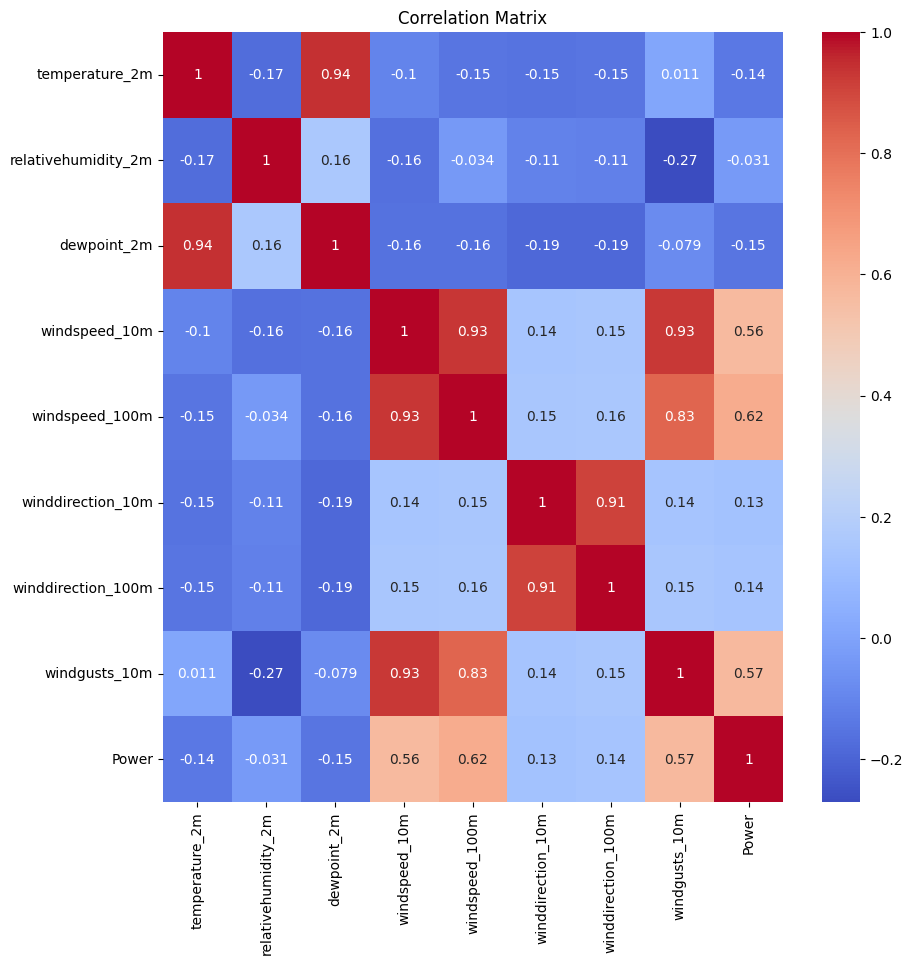

In [20]:
# Check the correlation between the cols and power
correlation = merged_data[numerical_columns].corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Feature and target selection
X = merged_data.drop('Power', axis=1)
y = merged_data['Power']

In [24]:
# Split the data into training and testing sets - 80% for training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Scale the numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
# Train with Linear Regression Model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# initialize the model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [27]:
# Make the predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Absolute Error:{mae}')
print(f'Mean Squared Error:{mse}')
print(f'R Squared Score: {r2}')

Mean Absolute Error:0.1376585805337513
Mean Squared Error:0.03254230698731513
R Squared Score: 0.5127994646410983


In [28]:
# Train using Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Train the RF model
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [33]:
# Let's predict
y_pred_rf = rf_model.predict(X_test)

# Evaluate the model
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'RF MAE: {mae_rf}')
print(f'RF MSE: {mse_rf}')
print(f'RF R2 Score: {r2_rf}')

RF MAE: 0.10662940119863015
RF MSE: 0.02155910436314834
RF R2 Score: 0.6772322505691262


In [35]:
pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.8/150.0 MB 5.6 MB/s eta 0:00:27
    --------------------------------------- 2.1/150.0 MB 5.9 MB/s eta 0:00:26
    --------------------------------------- 2.4/150.0 MB 5.8 MB/s eta 0:00:26
    --------------------------------------- 3.1/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 4.2/150.0 MB 4.3 MB/s eta 0:00:34
   - -------------------------------------- 5.0/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 5.5/150.0 MB 4.1 MB/s eta 0:00:36
   - -------------------------------------- 6.6/150.0 MB 4.0 MB/s eta 0:00:36
   -- ------------------------------------- 7.9/150.0 MB 4.3 MB/s eta 0:00:33
   -- ------------------------------------- 8.7/150.0 MB 4.2 MB/s eta 0:00:34
   -- ------------------------------------- 9.4/150.0 MB 4.2 MB/s eta 0


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
# Train using XGBoost Regressor Model
from xgboost import XGBRegressor

# Initialize the model
xgb_model = XGBRegressor()

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [39]:
# Prediction
y_pred_xgb = xgb_model.predict(X_test)

# Evaluate the model
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_absolute_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f'XGB MAE: {mae_xgb}')
print(f'XGB MSE: {mse_xgb}')
print(f'XGB R2: {r2_xgb}')

XGB MAE: 0.11572619130940615
XGB MSE: 0.11572619130940615
XGB R2: 0.6265164578779464


In [40]:
# Hyperparameter tuning
from sklearn.model_selection import GridSearchCV

#Define the parameter grid for GridSearchCV
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'colsample_bytree': [0.5, 0.8, 1.0],
    'subsample': [0.8, 1.0],
}

# Initialize the GridSearchCV
grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
    param_grid=param_grid,
    cv=3,
    n_jobs=-1,
    scoring='neg_mean_absolute_error',
)
# Fit the GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and best score
print(f'Best Parameters: {grid_search.best_params_}')
print(f'Best MEA: {-grid_search.best_score_}')

# Evaluate the tunned model
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(X_test)

mea_tuned = mean_absolute_error(y_test, y_pred_tuned)
mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tunned = r2_score(y_test, y_pred_tuned)

print(f'Tunned Model Mean Absolute Error (MEA): {mea_tuned}')
print(f'Tunned Model Mean Squared Error (MSE): {mse_tuned}')
print(f'Tunned Model R^2 Score: {r2_tunned}')

Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'subsample': 0.8}
Best MEA: 0.11371959838082517
Tunned Model Mean Absolute Error (MEA): 0.11319787019672918
Tunned Model Mean Squared Error (MSE): 0.023848119794683154
Tunned Model R^2 Score: 0.6429627212415572
